# Ridge chewiness

   target_moisture    fat  protein   carbs     ash  moisture  fiber
0            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
1            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
2            57.16  6.662  62.6988  20.491  4.2445    5.3937   0.51
3            57.51  6.582  63.1788  19.861  3.9545    5.9137   0.51
4            57.24  6.582  63.1788  19.861  3.9545    5.9137   0.51
   Chewiness
0  38.049816
1  31.294988
2  39.494747
3  26.862429
4  38.977081
[ 5  5  5  6  6  6  7  7  7  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  3  3  3  3  3  3  3
  3  3  4  4  4  4]
12


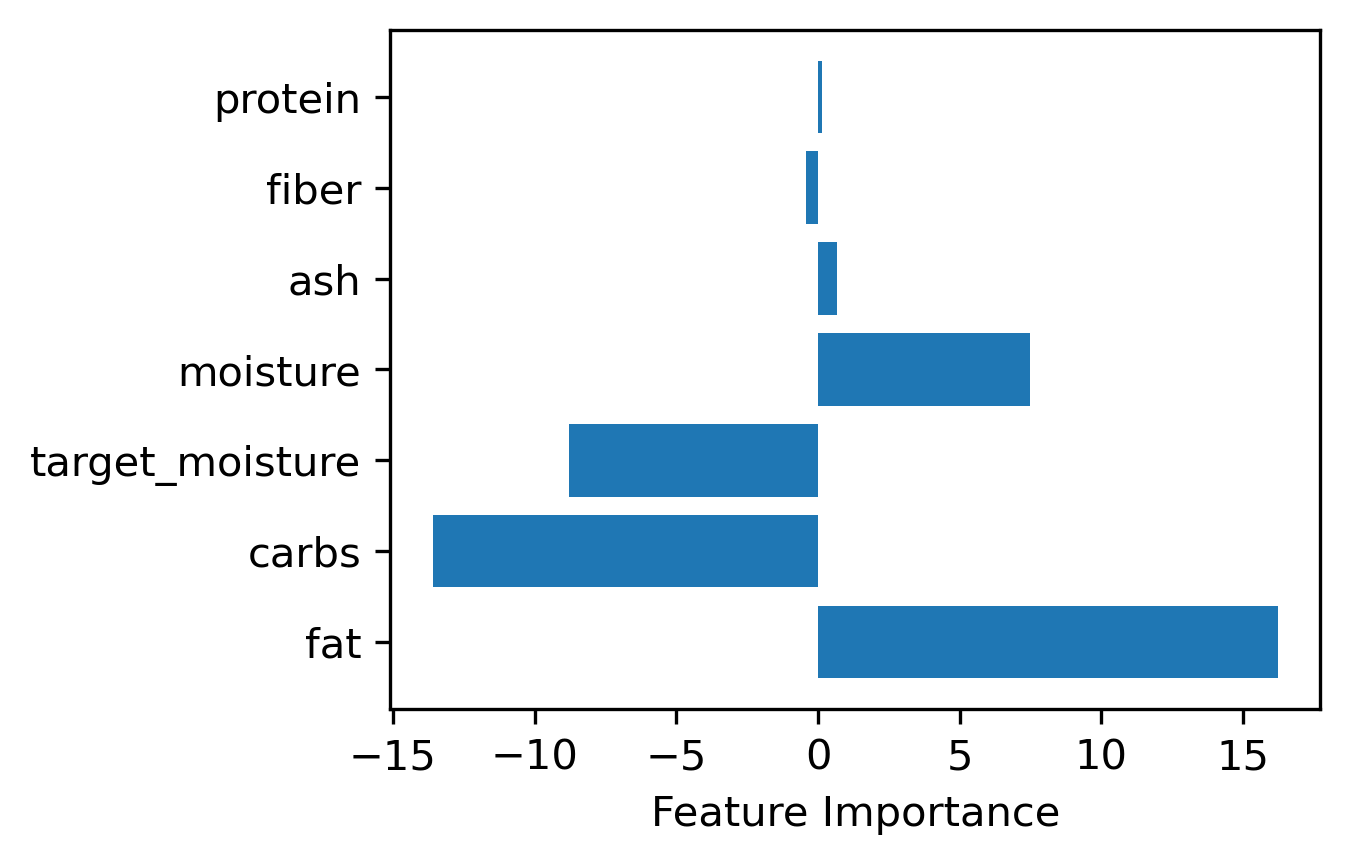

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeavePGroupsOut
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import itertools
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
data_all =pd.read_csv('./../Feature_Subsets/30_12_12.csv',header=0)
features_all=data_all.iloc[:,1:8]

response = 'chewiness'
if response=='crosswise':
    X = np.array(features_all)
   # y = np.array(features_all.iloc[:,6:7])
   # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
   # print(features_all.iloc[:,6:7].head())

elif response=='lengthwise':
    X = np.array(features_all)
   # y = np.array(features_all.iloc[:,7:8])    
   # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
   # print(features_all.iloc[:,7:8].head())    
    
elif response=='chewiness':
    X = np.array(features_all)
    y = np.array(data_all.iloc[:,9:10])
    print(features_all.head())
    print(data_all.iloc[:,9:10].head())
elif response=='hardness':
    X = np.array(features_all)
    y = np.array(data_all.iloc[:,8:9])
    print(features_all.head())
    print(data_all.iloc[:,8:9].head())        
        
    
y_true, predictions, residuals = list(), list(), list()
loo = LeavePGroupsOut(n_groups=1)
groups = data_all.iloc[:,10:11].values.ravel()
study_id = data_all.iloc[:,0]

print(groups)
k_fold=loo.get_n_splits(X,groups=groups)
print(k_fold)


##feat=feature_comb[score_rmse.argsort()[0]]  # x th best feature
feat=[0,1,2,3,4,5,6] 
X = np.array(features_all.iloc[:,feat])
g_mse, g_mae, g_rmse, g_r2, g_r2adj,g_mape = list(),list(),list(),list(),list(),list()
count=0
predictions_, y_trues_ = list(), list()
labels= list()

count += 1
scaler = StandardScaler()
X_tr = scaler.fit_transform(X)

labels.extend(study_id)

# scaler = StandardScaler()
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.transform(y_test)


reg_chew = Ridge().fit(X_tr, y.ravel())

fig = plt.figure(figsize=(4,3), dpi=300)
ax = plt.axes()
# residual =  y_test.ravel()-prediction
# residuals_.append(residual)

sorted_indices = np.argsort(-np.abs(reg_chew.coef_))

#sorted_val = -np.sort(-reg.coef_)
features_all_chew = features_all.rename(columns={"target moisture": "target\nmoisture"})

plt.barh(features_all_chew.columns[sorted_indices],reg_chew.coef_[sorted_indices])

plt.xlabel('Feature Importance')

#plt.title('Ridge All_data'+ '('+response+')')
#plt.savefig('Chw_fs.pdf', bbox_inches='tight')
plt.show()





# Ridge faba removed chewiness

   target moisture    fat  protein   carbs     ash  moisture  fiber
0            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
1            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
2            57.16  6.662  62.6988  20.491  4.2445    5.3937   0.51
3            57.51  6.582  63.1788  19.861  3.9545    5.9137   0.51
4            57.24  6.582  63.1788  19.861  3.9545    5.9137   0.51
   Chewiness
0  38.049816
1  31.294988
2  39.494747
3  26.862429
4  38.977081
[ 5  5  5  6  6  6  7  7  7  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  4  4  4  4]
11


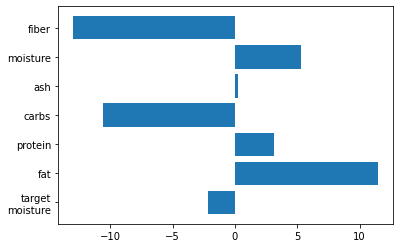

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeavePGroupsOut
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import itertools
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
data =pd.read_csv('30_12_12_faba_comm_removed.csv',header=0)
features_all_reg_removed=data.iloc[:,1:8]

response = 'chewiness'
if response=='crosswise':
    X = np.array(features_all_reg_removed)
   # y = np.array(features_all_reg_removed.iloc[:,6:7])
   # print(features_all_reg_removed.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
   # print(features_all_reg_removed.iloc[:,6:7].head())

elif response=='lengthwise':
    X = np.array(features_all_reg_removed)
   # y = np.array(features_all_reg_removed.iloc[:,7:8])    
   # print(features_all_reg_removed.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
   # print(features_all_reg_removed.iloc[:,7:8].head())    
    
elif response=='chewiness':
    X = np.array(features_all_reg_removed)
    y = np.array(data.iloc[:,9:10])
    print(features_all_reg_removed.head())
    print(data.iloc[:,9:10].head())
elif response=='hardness':
    X = np.array(features_all_reg_removed)
    y = np.array(data.iloc[:,8:9])
    print(features_all_reg_removed.head())
    print(data.iloc[:,8:9].head())        
        
    
y_true, predictions, residuals = list(), list(), list()
loo = LeavePGroupsOut(n_groups=1)
groups = data.iloc[:,10:11].values.ravel()
study_id = data.iloc[:,0]

print(groups)
k_fold=loo.get_n_splits(X,groups=groups)
print(k_fold)


##feat=feature_comb[score_rmse.argsort()[0]]  # x th best feature
feat=[0,1,2,3,4,5,6] 
X = np.array(features_all_reg_removed.iloc[:,feat])
g_mse, g_mae, g_rmse, g_r2, g_r2adj,g_mape = list(),list(),list(),list(),list(),list()
count=0
predictions_, y_trues_ = list(), list()
labels= list()

count += 1
scaler = StandardScaler()
X_tr = scaler.fit_transform(X)

labels.extend(study_id)

# scaler = StandardScaler()
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.transform(y_test)

reg_removed_chew = Ridge().fit(X_tr, y.ravel())

# residual =  y_test.ravel()-prediction
# residuals_.append(residual)    
features_all_reg_removed_chew = features_all_reg_removed.rename(columns={"target moisture": "target\nmoisture"})

plt.barh(features_all_reg_removed_chew.columns, reg_removed_chew.coef_)
plt.show()





<BarContainer object of 7 artists>

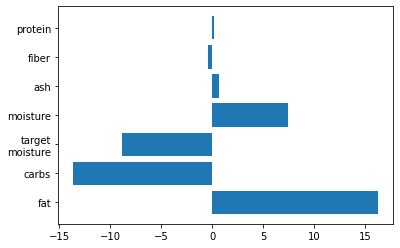

In [3]:
plt.barh(features_all_chew.columns[sorted_indices],reg_chew.coef_[sorted_indices])


In [4]:
faba_removed_chew_indices = [features_all_reg_removed_chew.columns.get_loc(i ) for i in features_all_chew.columns[sorted_indices]]

<BarContainer object of 7 artists>

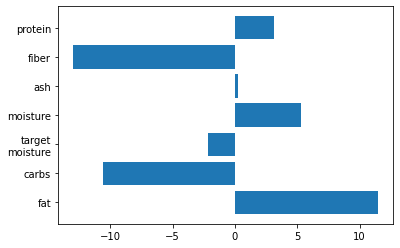

In [5]:
plt.barh(features_all_reg_removed_chew.columns[faba_removed_chew_indices],reg_removed_chew.coef_[faba_removed_chew_indices])


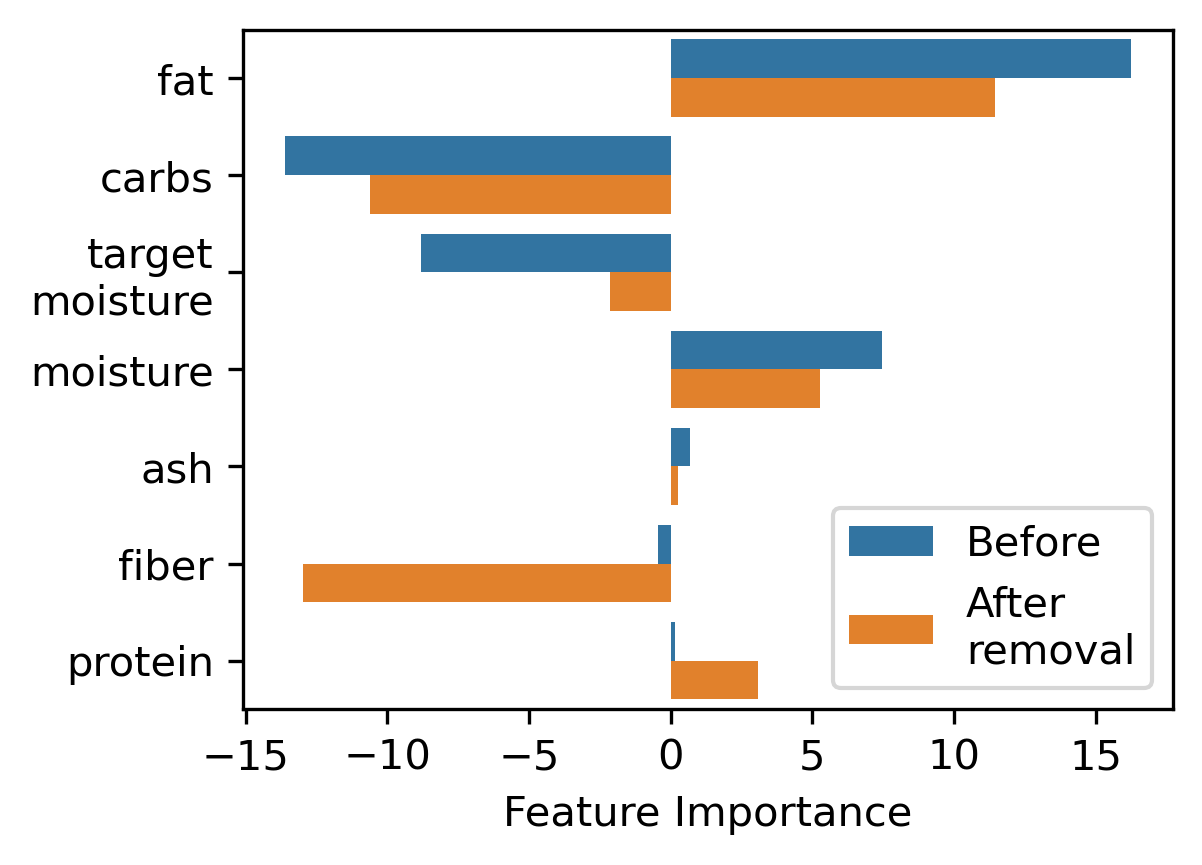

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(4,3), dpi=300)

df1=pd.DataFrame({'x':features_all_chew.columns[sorted_indices],'y':reg_chew.coef_[sorted_indices]})
df2=pd.DataFrame({'x':features_all_reg_removed_chew.columns[faba_removed_chew_indices],'y':reg_removed_chew.coef_[faba_removed_chew_indices]})

df1['Version']='Before'
df2['Version']='After\nremoval'

res=pd.concat([df1,df2])
sns.barplot(x='y',y='x',data=res,hue='Version')
#sns.despine(left=True, bottom=True)
plt.xlabel('Feature Importance')
plt.ylabel('')
#plt.xticks(rotation='45',y=0.03)
plt.legend(title='')

#plt.savefig('before_after_fabaremoval_chew.pdf', bbox_inches='tight')

# Ridge hardness

   target moisture    fat  protein   carbs     ash  moisture  fiber
0            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
1            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
2            57.16  6.662  62.6988  20.491  4.2445    5.3937   0.51
3            57.51  6.582  63.1788  19.861  3.9545    5.9137   0.51
4            57.24  6.582  63.1788  19.861  3.9545    5.9137   0.51
   Hardness
0   46.7090
1   40.4365
2   49.0595
3   38.6525
4   50.8115
[ 5  5  5  6  6  6  7  7  7  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  3  3  3  3  3  3  3
  3  3  4  4  4  4]
12


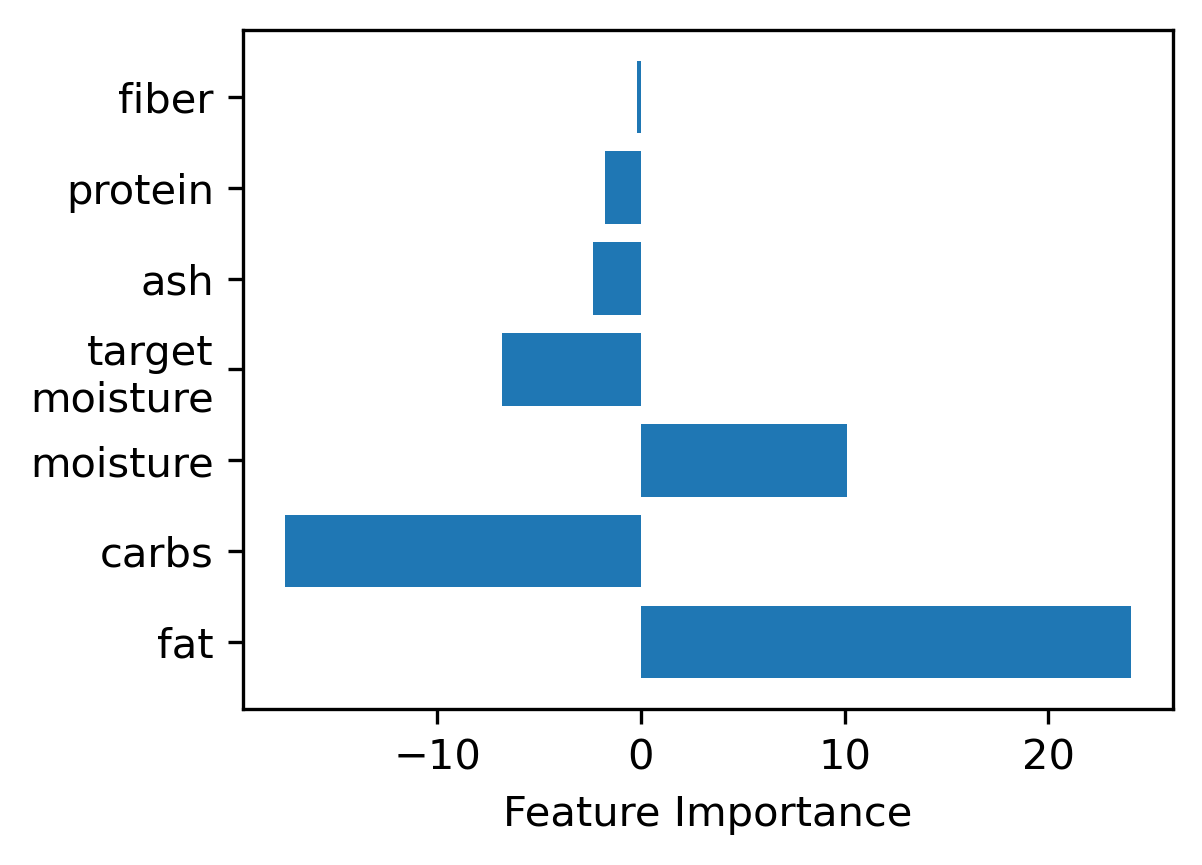

In [7]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeavePGroupsOut
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import itertools
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
data_all =pd.read_csv('./../Feature_Subsets/30_12_12.csv',header=0)
features_all=data_all.iloc[:,1:8]

response = 'hardness'
if response=='crosswise':
    X = np.array(features_all)
   # y = np.array(features_all.iloc[:,6:7])
   # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
   # print(features_all.iloc[:,6:7].head())

elif response=='lengthwise':
    X = np.array(features_all)
   # y = np.array(features_all.iloc[:,7:8])    
   # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
   # print(features_all.iloc[:,7:8].head())    
    
elif response=='chewiness':
    X = np.array(features_all)
    y = np.array(data_all.iloc[:,9:10])
    print(features_all.head())
    print(data_all.iloc[:,9:10].head())
elif response=='hardness':
    X = np.array(features_all)
    y = np.array(data_all.iloc[:,8:9])
    print(features_all.head())
    print(data_all.iloc[:,8:9].head())        
        
    
y_true, predictions, residuals = list(), list(), list()
loo = LeavePGroupsOut(n_groups=1)
groups = data_all.iloc[:,10:11].values.ravel()
study_id = data_all.iloc[:,0]

print(groups)
k_fold=loo.get_n_splits(X,groups=groups)
print(k_fold)


##feat=feature_comb[score_rmse.argsort()[0]]  # x th best feature
feat=[0,1,2,3,4,5,6] 
X = np.array(features_all.iloc[:,feat])
g_mse, g_mae, g_rmse, g_r2, g_r2adj,g_mape = list(),list(),list(),list(),list(),list()
count=0
predictions_, y_trues_ = list(), list()
labels= list()

count += 1
scaler = StandardScaler()
X_tr = scaler.fit_transform(X)

labels.extend(study_id)

# scaler = StandardScaler()
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.transform(y_test)


reg_hard= Ridge().fit(X_tr, y.ravel())

fig = plt.figure(figsize=(4,3), dpi=300)
ax = plt.axes()
# residual =  y_test.ravel()-prediction
# residuals_.append(residual)

sorted_indices_hard = np.argsort(-np.abs(reg_hard.coef_))

#sorted_val = -np.sort(-reg.coef_)
features_all_hard = features_all.rename(columns={"target moisture": "target\nmoisture"})

plt.barh(features_all_hard.columns[sorted_indices_hard],reg_hard.coef_[sorted_indices_hard])

plt.xlabel('Feature Importance')

#plt.title('Ridge All_data'+ '('+response+')')
#plt.savefig('Chw_fs.pdf', bbox_inches='tight')
plt.show()







# Ridge faba removed hardness

   target moisture    fat  protein   carbs     ash  moisture  fiber
0            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
1            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
2            57.16  6.662  62.6988  20.491  4.2445    5.3937   0.51
3            57.51  6.582  63.1788  19.861  3.9545    5.9137   0.51
4            57.24  6.582  63.1788  19.861  3.9545    5.9137   0.51
   Hardness
0   46.7090
1   40.4365
2   49.0595
3   38.6525
4   50.8115
[ 5  5  5  6  6  6  7  7  7  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  4  4  4  4]
11


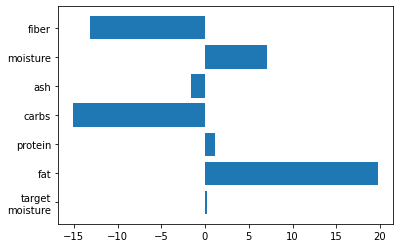

In [8]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeavePGroupsOut
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import itertools
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
data =pd.read_csv('30_12_12_faba_comm_removed.csv',header=0)
features_all_reg_removed=data.iloc[:,1:8]

response = 'hardness'
if response=='crosswise':
    X = np.array(features_all_reg_removed)
   # y = np.array(features_all_reg_removed.iloc[:,6:7])
   # print(features_all_reg_removed.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
   # print(features_all_reg_removed.iloc[:,6:7].head())

elif response=='lengthwise':
    X = np.array(features_all_reg_removed)
   # y = np.array(features_all_reg_removed.iloc[:,7:8])    
   # print(features_all_reg_removed.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
   # print(features_all_reg_removed.iloc[:,7:8].head())    
    
elif response=='chewiness':
    X = np.array(features_all_reg_removed)
    y = np.array(data.iloc[:,9:10])
    print(features_all_reg_removed.head())
    print(data.iloc[:,9:10].head())
elif response=='hardness':
    X = np.array(features_all_reg_removed)
    y = np.array(data.iloc[:,8:9])
    print(features_all_reg_removed.head())
    print(data.iloc[:,8:9].head())        
        
    
y_true, predictions, residuals = list(), list(), list()
loo = LeavePGroupsOut(n_groups=1)
groups = data.iloc[:,10:11].values.ravel()
study_id = data.iloc[:,0]

print(groups)
k_fold=loo.get_n_splits(X,groups=groups)
print(k_fold)


##feat=feature_comb[score_rmse.argsort()[0]]  # x th best feature
feat=[0,1,2,3,4,5,6] 
X = np.array(features_all_reg_removed.iloc[:,feat])
g_mse, g_mae, g_rmse, g_r2, g_r2adj,g_mape = list(),list(),list(),list(),list(),list()
count=0
predictions_, y_trues_ = list(), list()
labels= list()

count += 1
scaler = StandardScaler()
X_tr = scaler.fit_transform(X)

labels.extend(study_id)

# scaler = StandardScaler()
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.transform(y_test)

reg_removed_hard= Ridge().fit(X_tr, y.ravel())

# residual =  y_test.ravel()-prediction
# residuals_.append(residual)    
features_all_reg_removed_hard = features_all_reg_removed.rename(columns={"target moisture": "target\nmoisture"})

plt.barh(features_all_reg_removed_hard.columns, reg_removed_hard.coef_)
plt.show()





In [9]:
faba_removed_hard_indices = [features_all_reg_removed_hard.columns.get_loc(i ) for i in features_all_hard.columns[sorted_indices_hard]]

<BarContainer object of 7 artists>

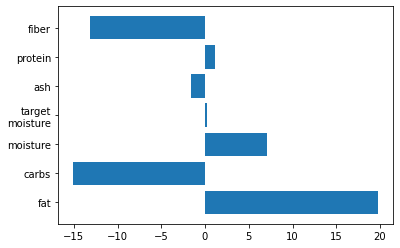

In [10]:
plt.barh(features_all_reg_removed_hard.columns[faba_removed_hard_indices],reg_removed_hard.coef_[faba_removed_hard_indices])


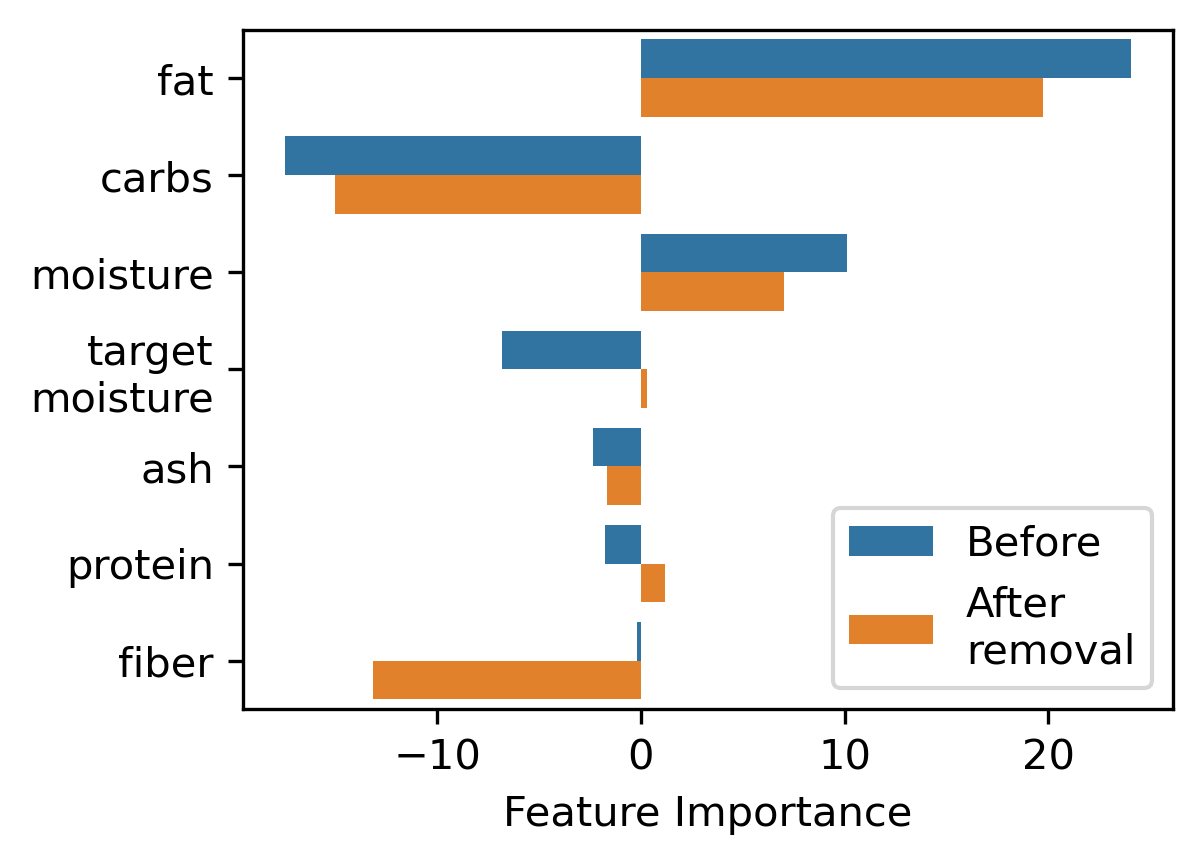

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(4,3), dpi=300)

df1=pd.DataFrame({'x':features_all_hard.columns[sorted_indices_hard],'y':reg_hard.coef_[sorted_indices_hard]})
df2=pd.DataFrame({'x':features_all_reg_removed_hard.columns[faba_removed_hard_indices],'y':reg_removed_hard.coef_[faba_removed_hard_indices]})

df1['Version']='Before'
df2['Version']='After\nremoval'

res=pd.concat([df1,df2])
sns.barplot(x='y',y='x',data=res,hue='Version')
#sns.despine(left=True, bottom=True)
plt.xlabel('Feature Importance')
plt.ylabel('')
#plt.xticks(rotation='45',y=0.03)
plt.legend(title='')

#plt.savefig('before_after_fabaremoval_hard.pdf', bbox_inches='tight')

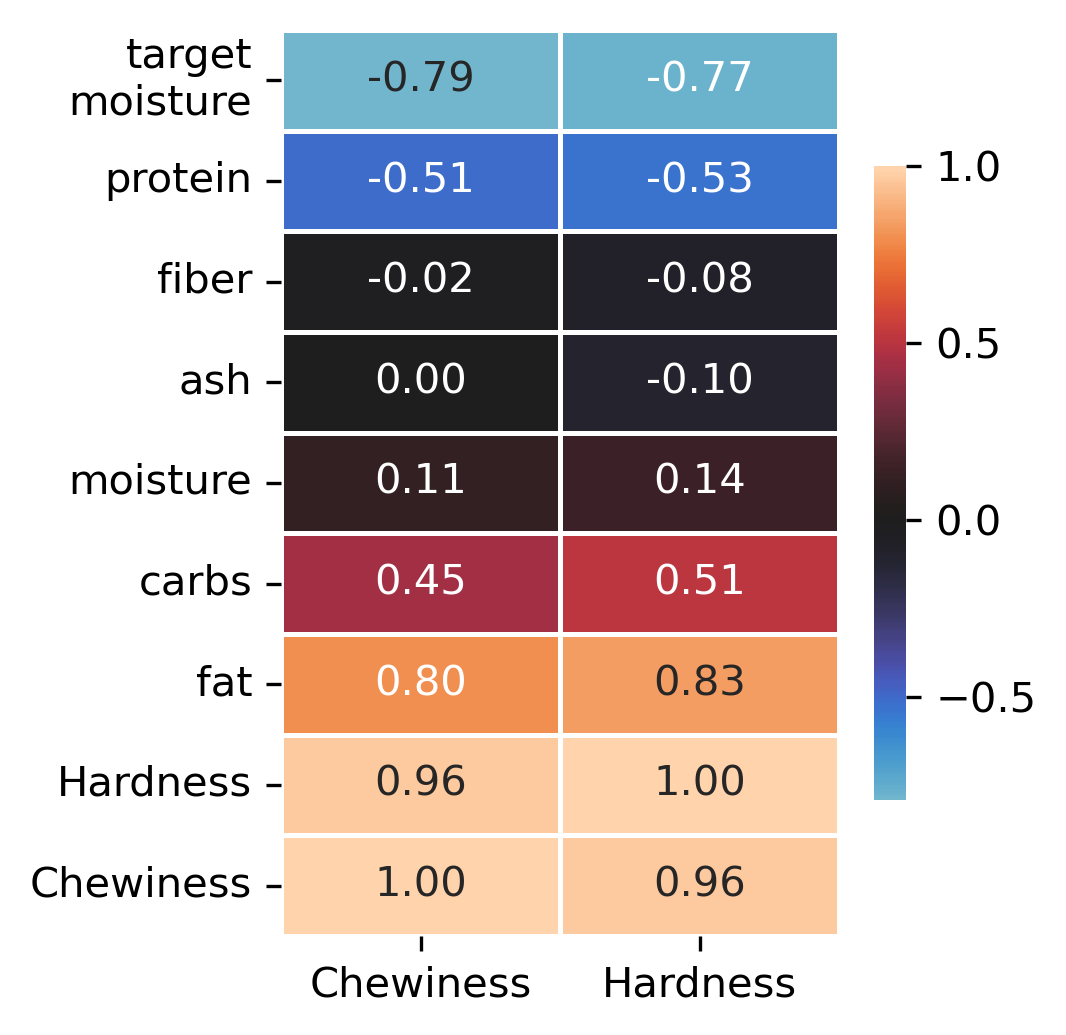

In [37]:
import seaborn as sns

fig = plt.figure(figsize=(3,4), dpi=300)

data_all = data_all.rename(columns={"target moisture": "target\nmoisture"})

sns.heatmap(data_all.corr().loc[:,['Chewiness','Hardness']].drop(['Study_ID','Group_ID']).sort_values(by='Chewiness'),vmax=1.0, center=0, fmt='.2f',
                square=False, linewidths=.8, annot=True, cbar_kws={"shrink": .70})
#plt.title('Correlation after Faba-Bean-Commercial Removed')

plt.savefig('corr_with_response_before.pdf', bbox_inches='tight')

In [21]:
data_all.corr().loc[:,['Chewiness','Hardness']].drop(['Study_ID','Group_ID']).sort_values(by='Chewiness')

,Chewiness,Hardness
fiber,-0.892701,-0.872126
target\nmoisture,-0.796752,-0.773201
protein,-0.567186,-0.636930
ash,-0.241698,-0.335184
moisture,0.023537,0.139172
carbs,0.443966,0.512704
fat,0.844532,0.857652
Hardness,0.962787,1.000000
Chewiness,1.000000,0.962787


In [38]:
index_before = data_all.corr().loc[:,['Chewiness','Hardness']].drop(['Study_ID','Group_ID']).sort_values(by='Chewiness').index

In [39]:
index_before

Index(['target\nmoisture', 'protein', 'fiber', 'ash', 'moisture', 'carbs',
       'fat', 'Hardness', 'Chewiness'],
      dtype='object')

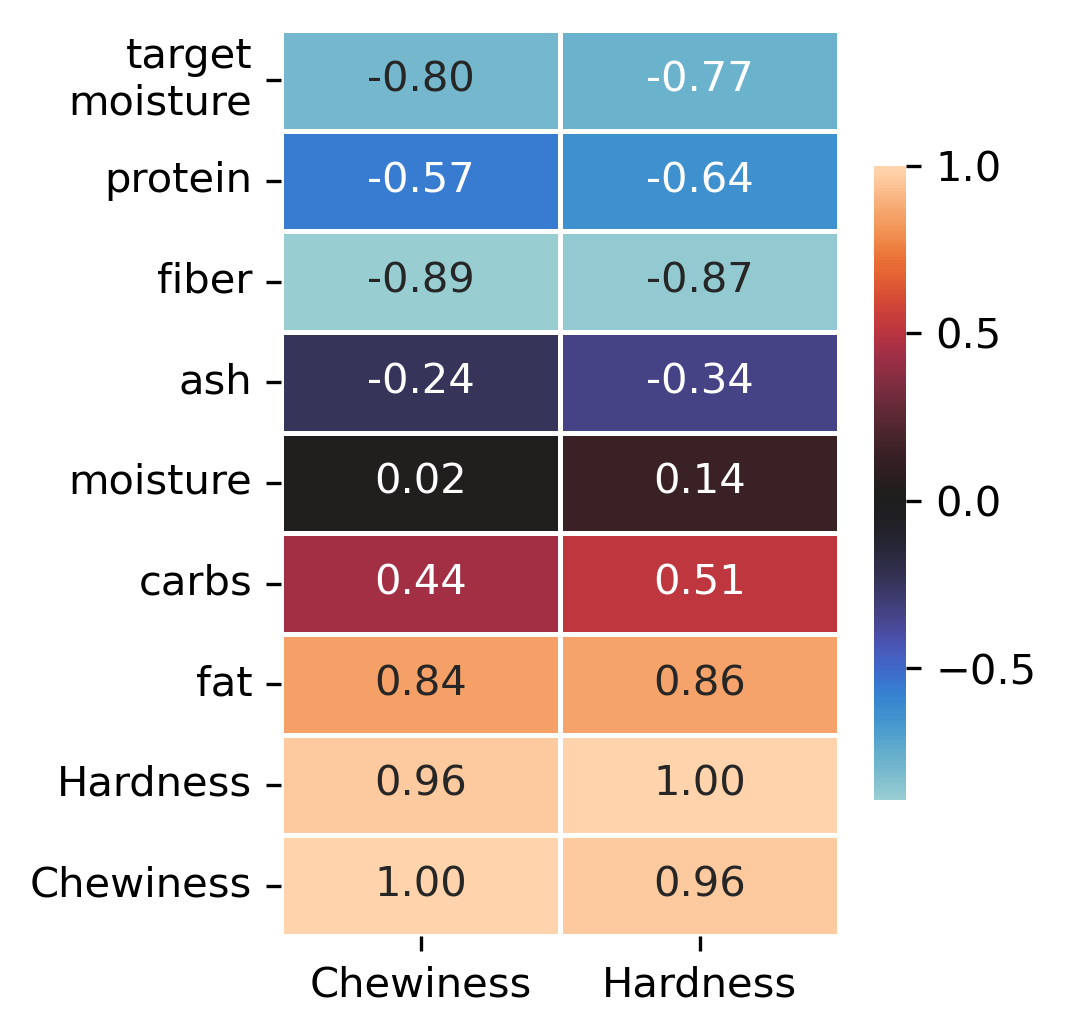

In [40]:
import seaborn as sns

fig = plt.figure(figsize=(3,4), dpi=300)

data = data.rename(columns={"target moisture": "target\nmoisture"})

sns.heatmap(data.corr().loc[:,['Chewiness','Hardness']].drop(['Study_ID','Group_ID']).reindex(index_before),vmax=1.0, center=0, fmt='.2f',
                square=False, linewidths=.8, annot=True, cbar_kws={"shrink": .70})
#plt.title('Correlation after Faba-Bean-Commercial Removed')

plt.savefig('corr_with_response_after.pdf', bbox_inches='tight')